# Importing libraries and pre-processing of data

In [127]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [128]:
df = pd.read_csv('housepred.csv')

In [129]:
df.isnull().sum() #checking for null values

Lot No.     0
Area        1
Age         0
Distance    0
Price       1
dtype: int64

In [130]:
df = df.dropna() #cleaning the data of null values
df # print dataframe

,Lot No.,Area,Age,Distance,Price
0,125,250.0,7,18,257.35
1,116,150.0,7,11,157.10
3,117,200.0,8,16,208.36
4,136,350.0,9,32,359.10
5,192,450.0,5,23,455.29
6,175,300.0,6,18,306.29
7,193,100.0,7,7,107.20
8,162,600.0,7,42,607.25
9,172,500.0,8,40,508.37
10,183,400.0,9,36,409.22


# Correlation Heatmap of Dataset

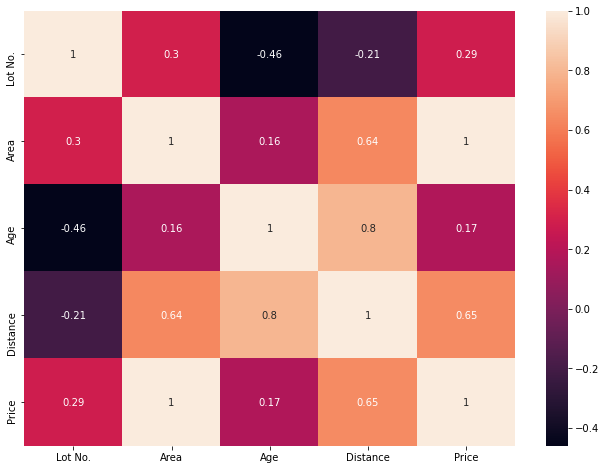

In [131]:
plt.figure(figsize=(11,8))
sns.heatmap(df.corr(), annot=True) #heatmap to correlate each column by pair
plt.show()

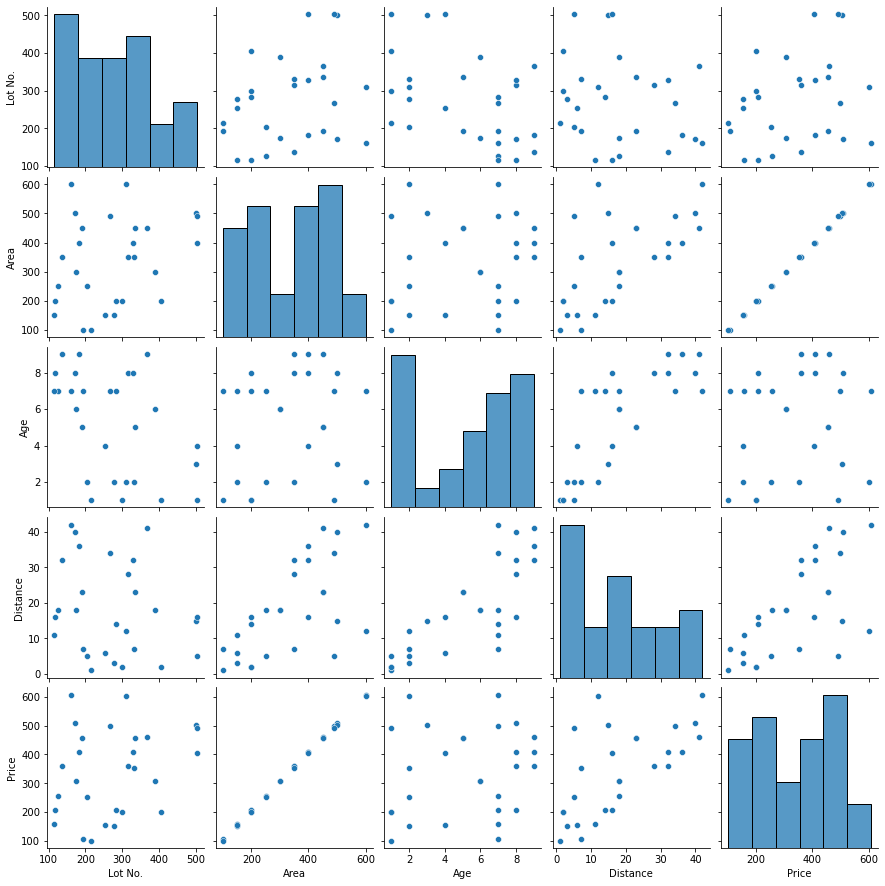

In [132]:
sns.pairplot(df) #scatterplot to show pair relationship

# Dependent and Independent Variables

In [243]:
X = df[['Area', 'Distance','Age']].values.reshape(-1,3) # independent variables
# disregarding Lot No. as it only has a weak correlation with price values
Y = df['Price'] # dependent variable

# Splitting dataset into training and test sets

In [244]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=0)

In [245]:
X_train.shape, Y_train.shape

((22, 3), (22,))

In [246]:
X_test.shape, Y_test.shape

((6, 3), (6,))

# Linear Regression Model

In [247]:
from sklearn import linear_model
model = linear_model.LinearRegression()
model.fit(X_train,Y_train) #training the model 
Y_pred = model.predict(X_test) #containing predicted values from X_test values

In [248]:
Y_pred

array([208.20257242, 306.24250747, 252.29891321, 358.22676879,
       306.24250747, 101.3484496 ])

# Checking Performance of Model

In [249]:
from sklearn.metrics import mean_squared_error, r2_score
print("Slope:", model.coef_)
print("Intercept:", model.intercept_)

Slope: [0.99971163 0.00562097 0.97123501]
Intercept: 0.4004304764197286


In [250]:
r2_score(Y_test, Y_pred) #the closer to 1, the better

0.9999986951321892

In [251]:
mean_squared_error(Y_test, Y_pred) #the lower the value, the better

0.009082732737490393

In [252]:
print("Train Score: ", model.score(X_train, Y_train))
print("Test Score: ", model.score(X_test, Y_test))

Train Score:  0.9999997608290263
Test Score:  0.9999986951321892


In [240]:
Y_pred2 = model.predict(np.array([[0,0,0]]))
Y_pred2

array([5.42232685])

In [241]:
y = model.coef_*(0,0,0) + model.intercept_
y

array([5.42232685, 5.42232685, 5.42232685])

In [242]:
pd.DataFrame({'Actual': Y_test, 'Predicted': Y_pred}) #comparison between actual and predicted Y values

,Actual,Predicted
3,208.36,206.736746
23,306.25,305.531361
15,252.30,253.556018
18,358.30,357.456859
6,306.29,306.047098
12,101.20,104.129634


# Analysis and Interpretation:

> In terms of price, strong relationships can be found when paired with area and distance. Area has a perfect positive correlation (1.00) and distance has a strong positive correlation (0.65).

> In terms of distance, strong relationships can be found when paired with price, age, and area. Price has a strong positive correlation (0.65), Age has a very strong positive correlation (0.85), and area has a strong positive correlation with area (0.64)

> Age only has a strong relationship with distance, with a very strong positive correlation (0.85).

> Area has a strong relationship with distance and price, with a strong positive correlation with distance (0.64) and a perfect positive correlation with price (1.00)

> Lot no. has no strong relationships with price, age, area, or distance.

> Slope values for area, distance, and age respectively are 0.99971163, 0.00562097, and 0.97123501. Meanwhile the intercept value is 0.4004304764197286.

> The r-squared score is 0.9999986951321892 or 1 when rounded up, indicating that the model is approximately perfect or perfect. The mean squared error value is approximately 0.009, indicating that the model is great with minimal error.


# Conclusion

With the following EDA results, it is concluded that in order to predict the house price, the distance, area, and age values should be considered in creating the model. Distance and area values are to be considered due to its direct strong positive correlation with the price value, meaning if either or both of the two goes up or down, it will also significantly affect the rise and fall of house prices. As distance serves to be a signficant variable related to house prices, age is also considered due to its strong positive correlation with distance, making it such that an age value change will significantly impact distance, which indirectly affects price values significantly as well. The model that resulted from these variables has shown to be near perfect as seen from its r-squared score and mean squared error value. This makes it a great model to use for predicting house prices.